In [ ]:
'''
This is the examle code given for the MTS overlay. I found it on github and made some minor changes
'''

from rfsoc_mts import mtsOverlay
import numpy as np
import matplotlib.pyplot as plt
ol = mtsOverlay('mts.bit')
import scipy.signal as sp_sig

In [2]:
DAC_SR = 4.0E9  # Sample rate of DACs and ADCs is 4.0 GHz
ADC_SR = 4.0E9
Fc = 250.0E6 # Set center frequency of waveform to 250.0 MHz
Fe = 300.0E6 # maximum frequency of chirp at end of record

Fsq = 5.0E6 # Square wave frequency, added by Joe

DAC_Amplitude = 16383.0  # 14bit DAC +16383/-16384
X_axis = (1/DAC_SR) * np.arange(0,ol.dac_player.shape[0])

In [3]:
# generate some basic waveforms
DAC_sinewave = DAC_Amplitude * np.sin(2*np.pi*Fc*X_axis)
DAC_sawtooth = DAC_Amplitude * sp_sig.sawtooth(2 * np.pi * Fc * X_axis)
DAC_chirp = DAC_Amplitude * sp_sig.chirp(np.arange(0, ol.dac_player.shape[0])/DAC_SR,
                                  f0=Fc, f1=Fe, t1=(ol.dac_player.shape[0]/DAC_SR), 
                                  phi=0.0, method='linear')
DAC_square = DAC_Amplitude * sp_sig.square(2 * np.pi * Fsq * X_axis)
DAC_sin_square = DAC_Amplitude * np.sin(2*np.pi*Fc*X_axis) * (sp_sig.square(2*np.pi*Fsq*X_axis) + 1)

DAC_off = 0 * DAC_sinewave # To turn it off, we can just output 0

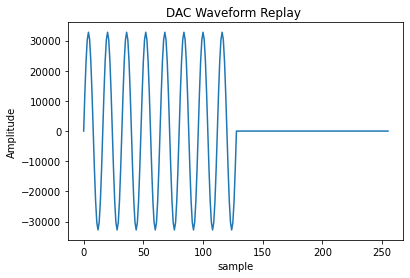

In [4]:
# ol.dac_player[:] = np.int16(DAC_sinewave)
# ol.dac_player[:] = np.int16(DAC_sawtooth)
# ol.dac_player[:] = np.int16(DAC_chirp)
# ol.dac_player[:] = np.int16(DAC_square)
ol.dac_player[:] = np.int16(DAC_sin_square)

pNumSamples = 256
pS = 0

# This plots the waveform as a check
ol.trigger_capture()
plt.title('DAC Waveform Replay ')
plt.xlabel('sample')         
plt.ylabel('Amplitude')
plt.plot(ol.dac_capture[pS:pNumSamples])
plt.show()
# Note that the waveform is NOT aligned to sample zero of the DACRAM as it is free-running

In [ ]:
ol.dac_player[:] = np.int16(DAC_off)